In [3]:
import function as f

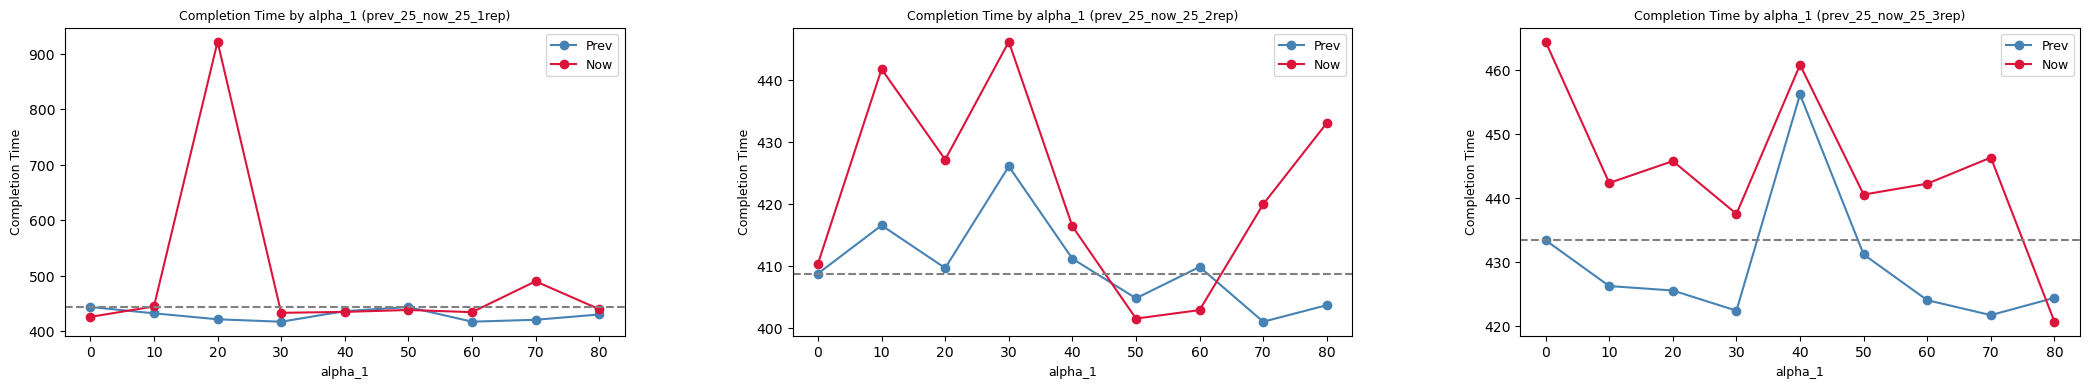

In [35]:
directory_path ='../Simulation/Assets/Results/Congestion'

x_label = "alpha_1"
y_label = "Completion Time"
title = "Completion Time by alpha_1"

col_num = 3

create_subplot_completion(directory_path, x_label, y_label, title, col_num, (26,4))